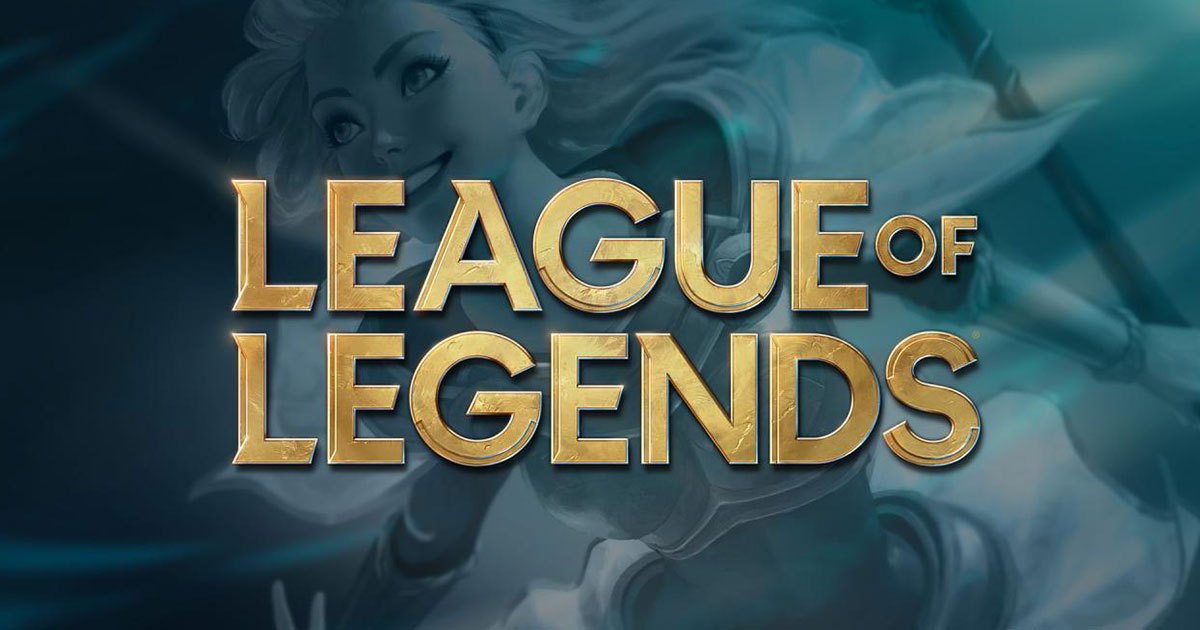

# What is League of Legends?

League of Legends is a team-based strategy game where two teams of five powerful champions face off to destroy the other’s base. Choose from over 140 champions to make epic plays, secure kills, and take down towers as you battle your way to victory.

### Objective

Your team needs to clear at least one lane to get to the enemy Nexus. Blocking your path are defense structures called turrets and inhibitors. Each lane has three turrets and one inhibitor, and each Nexus is guarded by two turrets.

### Jungle

In between the lanes is the jungle, where neutral monsters and jungle plants reside. The two most important monsters are ~~Baron Nashor~~ Rift Herald and the Drakes. Killing these units grants unique buffs for your team and can also turn the tide of the game.

### Roles

There are five positions (Top, Jungle, Mid, Bot, and Support) that make up the recommended team comp for the game. Each lane lends itself to certain kinds of champions and roles—try them all or lock in to the lane that calls you.

# Powering Up

Champions get stronger by earning experience to level up and gold to buy more powerful items as the game progresses. Staying on top of these two factors is crucial to overpowering the enemy team and destroying their base.

### Earn Experience

When champions earn a certain amount of experience, they level up and can unlock or strengthen abilities and raise their base stats. Gain experience by killing enemy units and champions, assisting in a kill, and destroying defense structures.

### Earn Gold

Gold is the in-game currency to buy items for your champion. Earn gold by killing enemy units and champions, assisting in a kill, destroying defense structures, and equipping gold income items.

# Analyze data to win League of Legends game

Data consists of 10k unique league games (only first 10 minutes)

In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
print("Setup Complete")

Setup Complete


In [2]:
df = pd.read_csv("high_diamond_ranked_10min.csv")

In [3]:
df.head()
#displays the first 5 rows 

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
df.shape
#returns 9879 rows and 40 columns

(9879, 40)

In [5]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [6]:
df.count()
#check how many rows in each column (check for possible missing values)

gameId                          9879
blueWins                        9879
blueWardsPlaced                 9879
blueWardsDestroyed              9879
blueFirstBlood                  9879
blueKills                       9879
blueDeaths                      9879
blueAssists                     9879
blueEliteMonsters               9879
blueDragons                     9879
blueHeralds                     9879
blueTowersDestroyed             9879
blueTotalGold                   9879
blueAvgLevel                    9879
blueTotalExperience             9879
blueTotalMinionsKilled          9879
blueTotalJungleMinionsKilled    9879
blueGoldDiff                    9879
blueExperienceDiff              9879
blueCSPerMin                    9879
blueGoldPerMin                  9879
redWardsPlaced                  9879
redWardsDestroyed               9879
redFirstBlood                   9879
redKills                        9879
redDeaths                       9879
redAssists                      9879
r

In [7]:
df['blueWins'].describe()
#out of 9879 games, there's a ~50% of either blue or red team winning

count    9879.000000
mean        0.499038
std         0.500024
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: blueWins, dtype: float64

0    4949
1    4930
Name: blueWins, dtype: int64


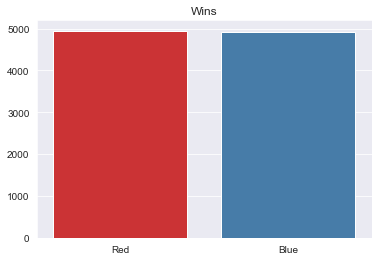

In [8]:
sns.countplot(x=df.blueWins, palette = 'Set1')
plt.xticks([0,1],['Red','Blue'])
plt.xlabel('')
plt.ylabel('')
plt.title('Wins')
print(df['blueWins'].value_counts())
#Representation between the amount of red and blue wins (r=4949, b=4930)

In [9]:
df = df.loc[:, ~df.columns.str.startswith('red')]
#drop all columns of red team's data

In [10]:
del df['gameId']
#drop gameId column (doesn't provide anymore information other than uniqueness)

In [11]:
df.head()
#check if dropped worked (only contains 21 columns instead of 40 )

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0


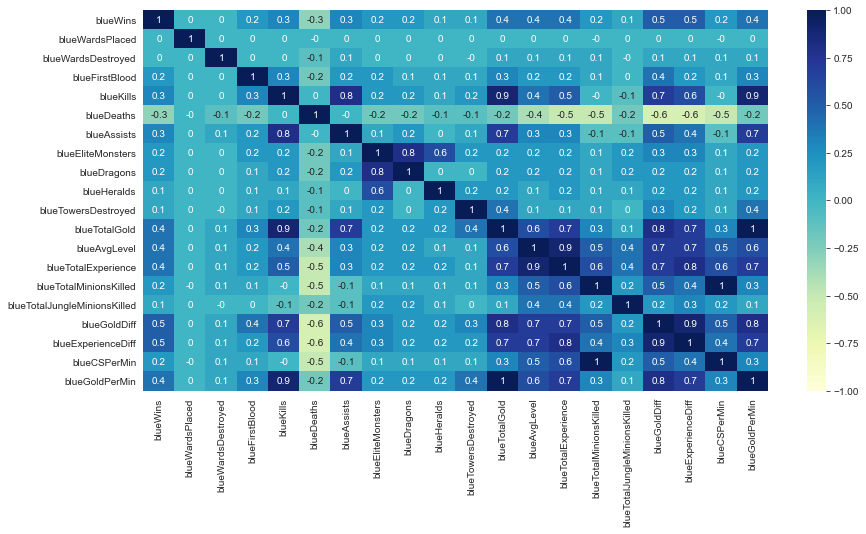

In [12]:
plt.figure(figsize=(14,7))
# mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
sns.heatmap(data=df.corr().round(1),vmin=-1,vmax=1, cmap="YlGnBu",annot=True)
#main feature of blue team winning consists of (kills, assists, avglevel, experience, gold diff)

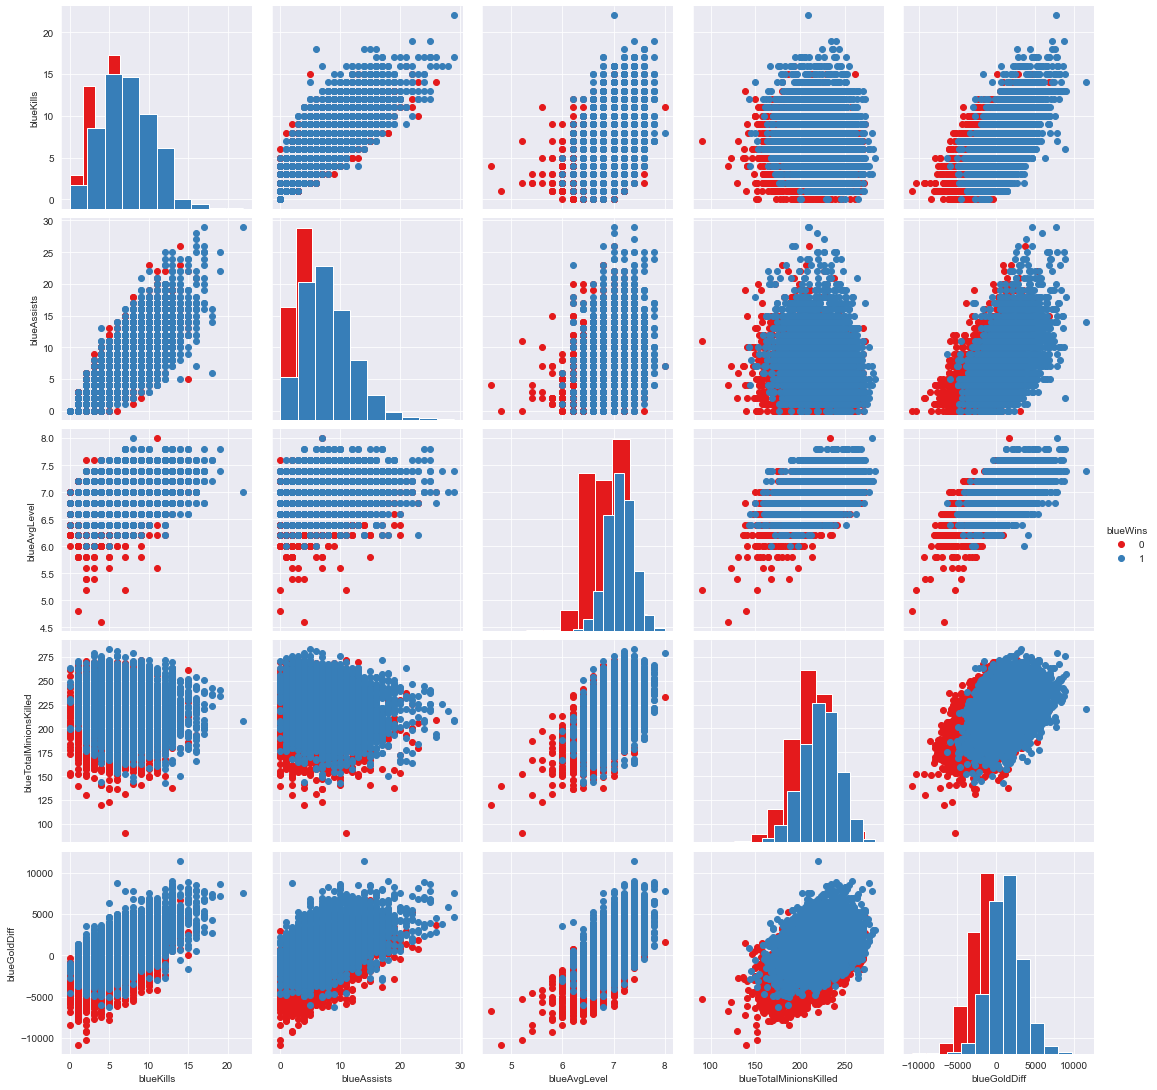

In [21]:
g = sns.PairGrid(data=df, vars=['blueKills', 'blueAssists', 'blueAvgLevel', 'blueTotalMinionsKilled', 'blueGoldDiff'],
                 hue='blueWins', height=3, palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();
#correlation between the blue teams win conditions (kills, assists, levels, minions, and gold difference)

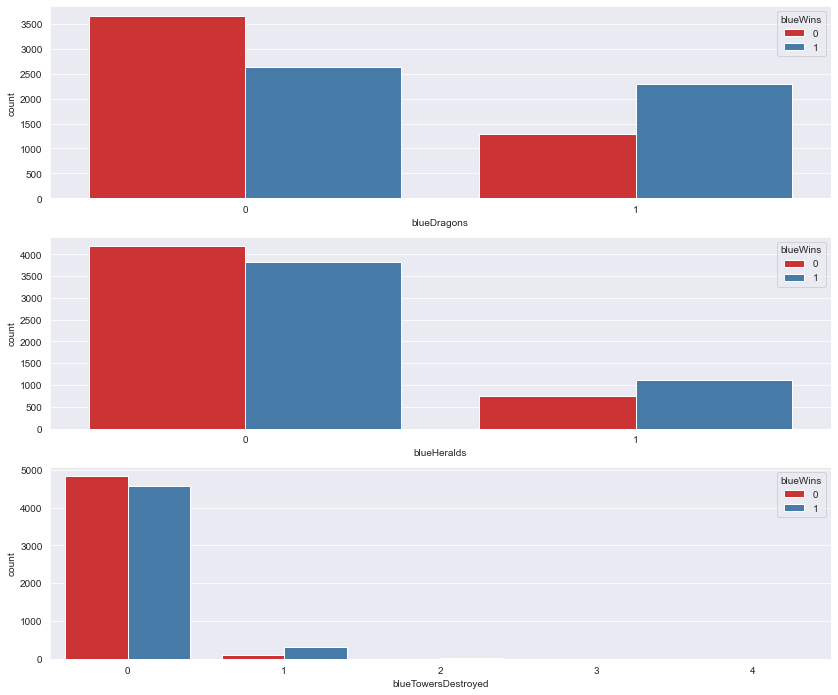

In [14]:
fig,ax = plt.subplots(3, figsize=(14,12))
sns.countplot(data=df, x='blueDragons', hue='blueWins', ax=ax[0], palette='Set1')
sns.countplot(data=df, x='blueHeralds', hue='blueWins', ax=ax[1], palette='Set1')
sns.countplot(data=df, x='blueTowersDestroyed', hue='blueWins', ax=ax[2] ,palette='Set1')
plt.show()
# print(df.blueDragons.value_counts())
# print(df.blueHeralds.value_counts())
# print(df.blueTowersDestroyed.value_counts())
#Exploring other factors (objectives) that could increase/decrease the chances of blue team winning

# Conclusion

How to win?
- Build leads through gold and level
 - Both gold and level were mainly obtained from champion kills, champion assists, and minions
- Warding impacts the game through providing/denying visions but has very low impact in game results
- Objectives (towers, heralds, and dragon) aren't top priority in winning the game

If the game was longer than 10 minutes, then some variable may change where aquiring objectives would have a bigger impact and etc. 

## Summary

Takeaways: farm gold and levels through killing minions, enemies, and helping teammates kill enemies. Don't prioritize on objectives (Towers, Heralds, Dragons). Don't spend too much time and gold on warding/destroying wards.